# Exploratory Data Analysis on ICC T20 WC 2022: Part 1

### Reading the datasets

In [1]:
batt = read.csv('batting_card.csv')
bowl = read.csv('bowling_card.csv')
details = read.csv('details.csv')
t20.sum = read.csv('summary.csv')

### Getting the Prerequisite Libraries

In [2]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


#### Most Runs Scored in ICC T20 WC 2022

In [3]:
most.runs = batt %>% group_by(fullName) %>% 
  summarise(Runs = sum(runs)) %>% arrange(desc(Runs)) %>% 
  rename(Batter = fullName) %>% slice(1:10)

most.runs

Batter,Runs
Virat Kohli,296
Max O'Dowd,242
Suryakumar Yadav,239
Jos Buttler,225
Kusal Mendis,223
Sikandar Raza,219
Pathum Nissanka,214
Alex Hales,212
Lorcan Tucker,204
Glenn Phillips,201


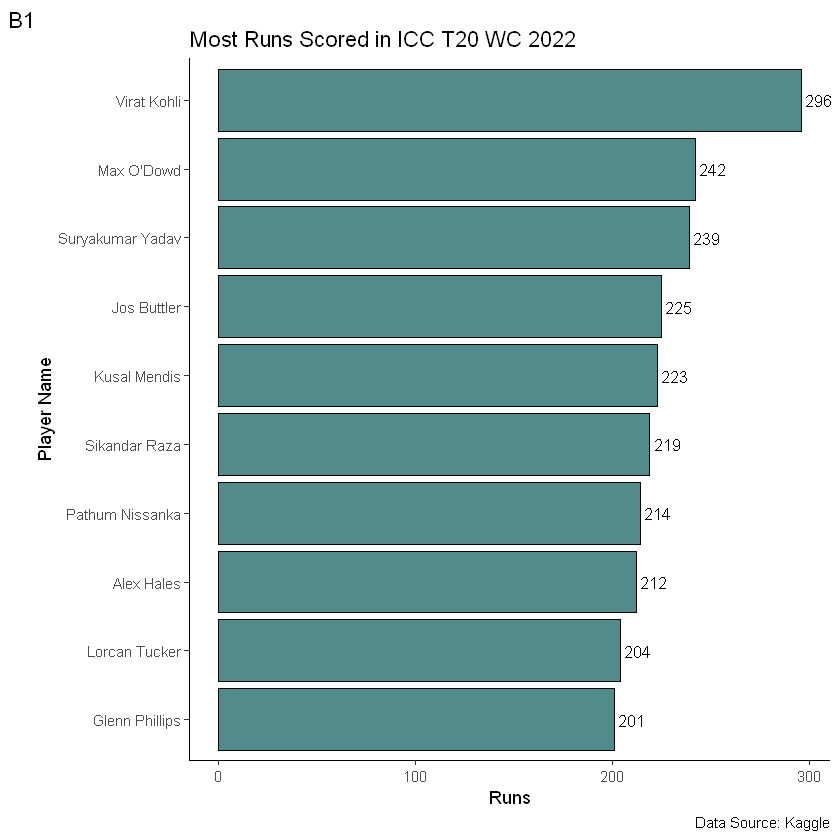

In [4]:
ggplot(most.runs, aes(reorder(Batter, Runs), Runs)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  labs(title = 'Most Runs Scored in ICC T20 WC 2022', x = 'Player Name',
       caption = 'Data Source: Kaggle', tag = 'B1' ) +
  geom_text(aes(label = Runs, hjust = -0.15), size = 3.5)

#### Best Batting Average for Min. 200 Runs Scored in ICC T20 WC 2022

In [5]:
bat.avg = batt %>% group_by(fullName) %>% summarise(Runs. = sum(runs), 
  Innings = n(), Not.out = sum(isNotOut), 
  Average = round(Runs./(Innings - Not.out), digits = 2)) %>% 
  arrange(desc(Runs.)) %>% slice(1:10) %>% rename(Player = fullName) %>% 
  select(Player, Runs., Average)

bat.avg

Player,Runs.,Average
Virat Kohli,296,98.67
Max O'Dowd,242,34.57
Suryakumar Yadav,239,59.75
Jos Buttler,225,45.00
Kusal Mendis,223,31.86
Sikandar Raza,219,27.38
Pathum Nissanka,214,30.57
Alex Hales,212,42.40
Lorcan Tucker,204,40.80
Glenn Phillips,201,40.20


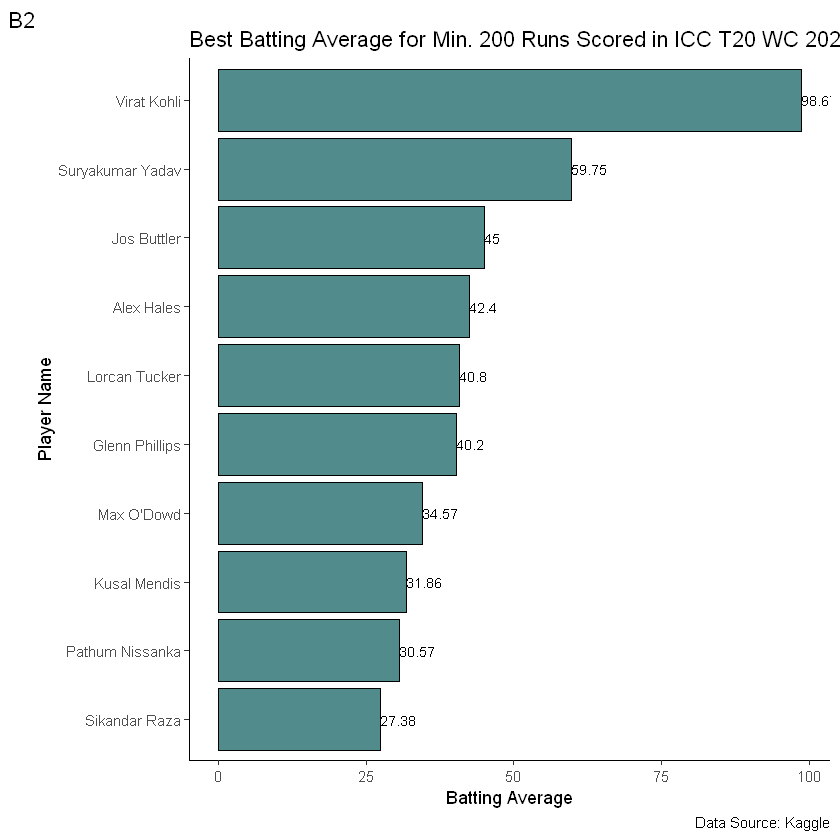

In [6]:
ggplot(bat.avg, aes(reorder(Player, Average), Average)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Average, hjust = -0.0001),  size = 3) +
labs(title= 'Best Batting Average for Min. 200 Runs Scored in ICC T20 WC 2022',
       x = 'Player Name',
       y = 'Batting Average', caption = 'Data Source: Kaggle', tag = 'B2')

#### Most Fours Hit by Batters in ICC T20 WC 2022

In [7]:
most.fours = batt %>% group_by(fullName) %>% 
  summarise(Total_Fours = sum(fours)) %>% arrange(desc(Total_Fours)) %>% 
  rename(Batter = fullName) %>% slice(1:12)

most.fours

Batter,Total_Fours
Suryakumar Yadav,26
Virat Kohli,25
Jos Buttler,24
Max O'Dowd,22
Najmul Hossain Shanto,20
Alex Hales,19
Glenn Phillips,19
Lorcan Tucker,19
Kusal Mendis,17
George Munsey,16


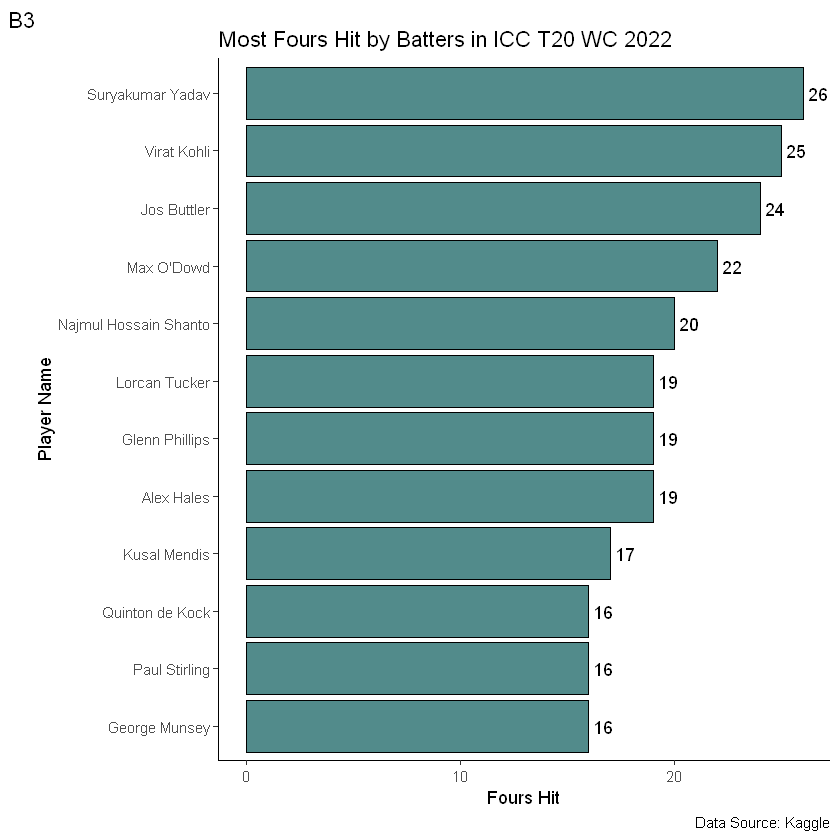

In [8]:
ggplot(most.fours, aes(reorder(Batter, Total_Fours), Total_Fours)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Total_Fours, hjust = -0.25)) + 
  labs(title = 'Most Fours Hit by Batters in ICC T20 WC 2022' ,x = 'Player Name', 
       y = 'Fours Hit', caption = 'Data Source: Kaggle', tag = 'B3')

#### Most Sixes Hit by Batters in ICC T20 WC 2022

In [9]:
most.sixes = batt %>% group_by(fullName) %>% 
  summarise(Total_Sixes = sum(sixes)) %>% arrange(desc(Total_Sixes)) %>% 
  slice(1:15) %>% rename(Player = fullName)

most.sixes

Player,Total_Sixes
Sikandar Raza,11
Alex Hales,10
Kusal Mendis,10
Andy Balbirnie,9
Marcus Stoinis,9
Rilee Rossouw,9
Suryakumar Yadav,9
Glenn Phillips,8
KL Rahul,8
Max O'Dowd,8


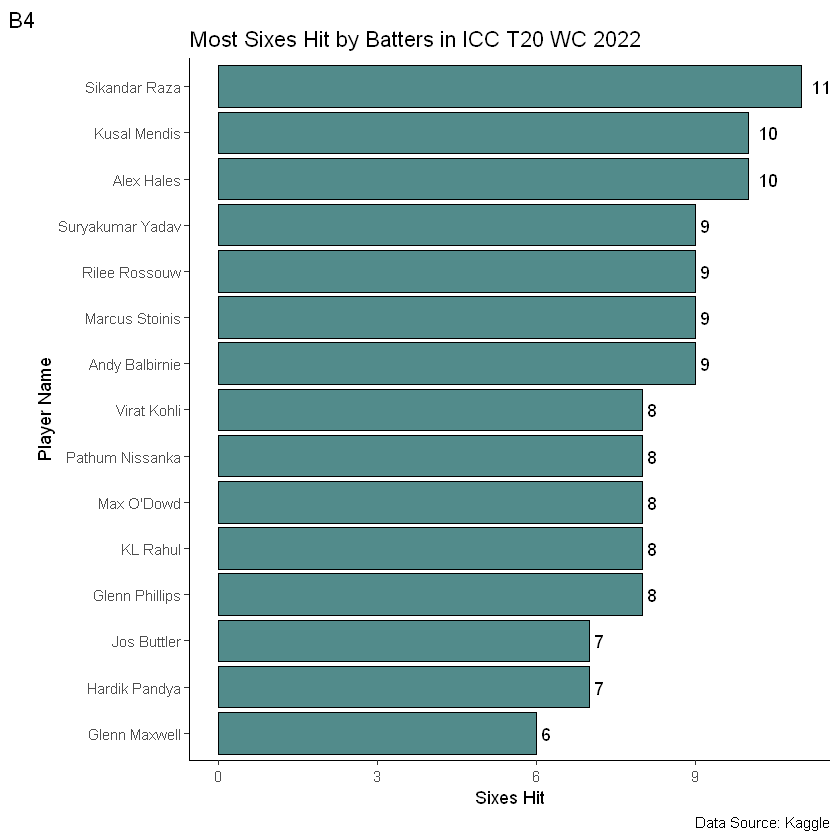

In [10]:
ggplot(most.sixes, aes(reorder(Player, Total_Sixes), Total_Sixes)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Total_Sixes, hjust = -0.5)) + 
  labs(title = 'Most Sixes Hit by Batters in ICC T20 WC 2022' ,x = 'Player Name', 
       y = 'Sixes Hit', caption = 'Data Source: Kaggle', tag = 'B4')

#### Most Player of Match Awards Received by Players in ICC T20 WC 2022

In [11]:
most.pom = t20.sum %>% group_by(pom) %>% 
  summarise(Awards = n()) %>% arrange(desc(Awards)) %>% 
  rename(Player = pom) %>% slice(1:9)

most.pom

Player,Awards
,3
Sikandar Raza,3
Bas de Leede,2
Kusal Mendis,2
Sam Curran,2
Shadab Khan,2
Suryakumar Yadav,2
Taskin Ahmed,2
Virat Kohli,2


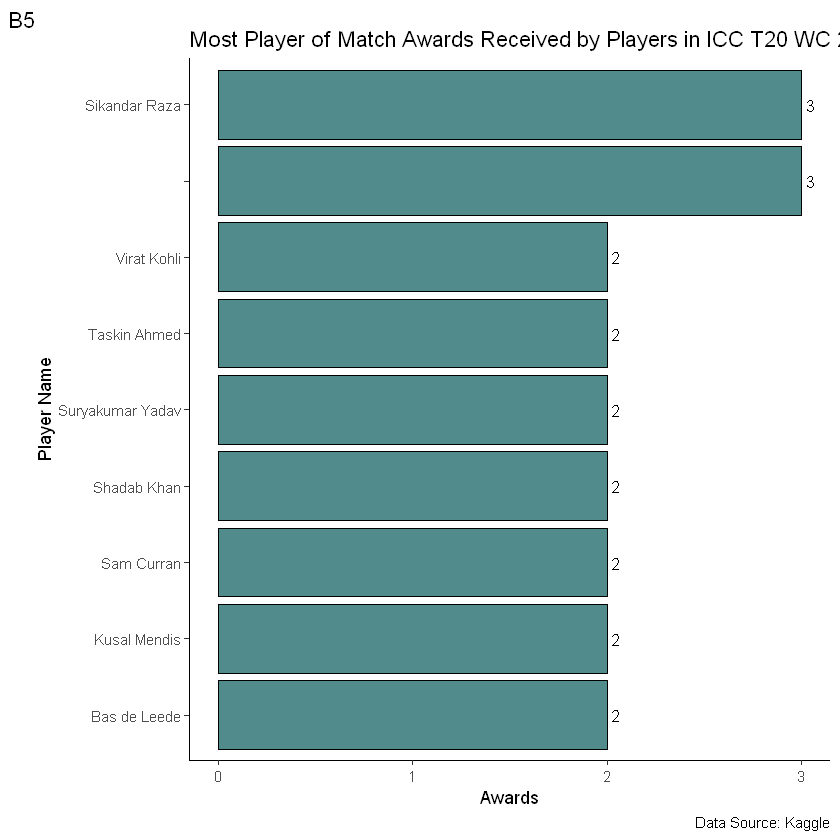

In [12]:
ggplot(most.pom, aes(reorder(Player, Awards), Awards)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Awards, hjust = -0.5), size = 3.5) + 
labs(title = 'Most Player of Match Awards Received by Players in ICC T20 WC 2022' 
       ,x = 'Player Name',
       y = 'Awards', caption = 'Data Source: Kaggle', tag = 'B5')

#### Highest Strike Rate in ICC T20 WC 2022 (Min. 100 Runs Scored)

In [13]:
max.sr = batt %>% group_by(fullName) %>% 
  summarise(Runs.scored = sum(runs),
        SR = round(sum(runs)/sum(ballsFaced) * 100, digits = 2)) %>% 
  arrange(desc(SR)) %>% filter(Runs.scored >= 100) %>% slice(1:10) %>% 
  rename(Player = fullName)

max.sr$SR = paste0(max.sr$SR, '%')

max.sr

options(warn = -1)

Player,Runs.scored,SR
Suryakumar Yadav,239,189.68%
Rilee Rossouw,141,169.88%
Curtis Campher,126,163.64%
Glenn Maxwell,118,161.64%
Marcus Stoinis,126,161.54%
Quinton de Kock,124,161.04%
Glenn Phillips,201,158.27%
Sikandar Raza,219,147.97%
Alex Hales,212,147.22%
Jos Buttler,225,144.23%


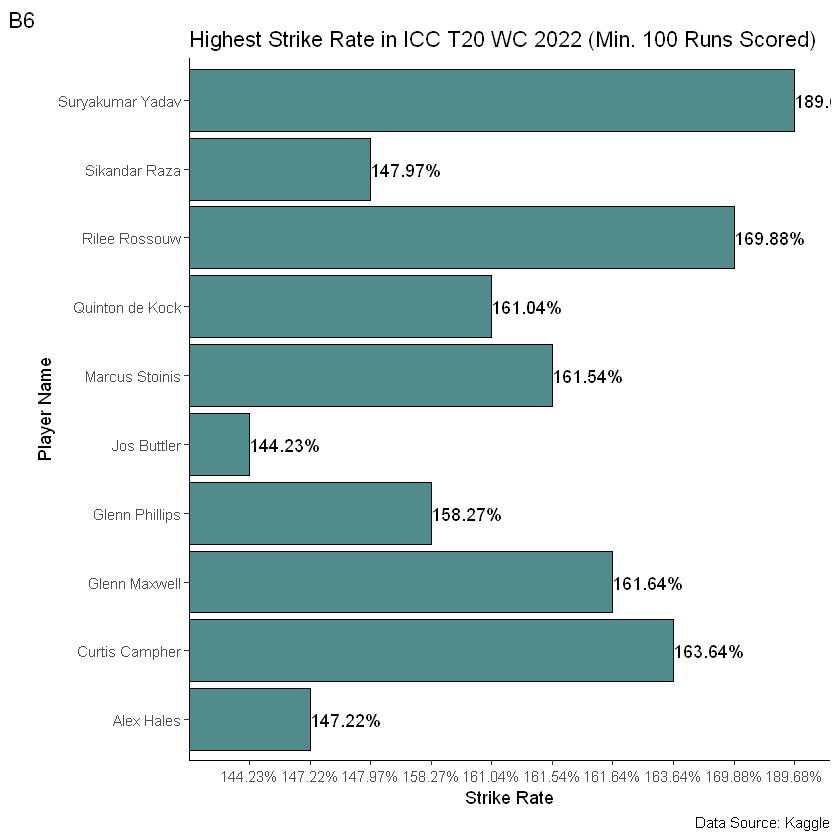

In [14]:
ggplot(max.sr, aes(reorder(Player, SR), SR)) + 
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = SR, hjust = -0.00001)) + 
  labs(title = 'Highest Strike Rate in ICC T20 WC 2022 (Min. 100 Runs Scored)' 
       ,x = 'Player Name', y = 'Strike Rate',
        caption = 'Data Source: Kaggle', tag = 'B6')

#### Most Wickets Taken by Bowlers in ICC T20 WC 2022

In [15]:
max.wk = bowl %>% group_by(fullName) %>% 
  summarise(WK = sum(wickets)) %>% arrange(desc(WK)) %>% 
  slice(1:10) %>% rename(Player = fullName) %>% rename(Wickets = WK)

max.wk

Player,Wickets
Wanindu Hasaranga de Silva,15
Bas de Leede,13
Sam Curran,13
Blessing Muzarabani,12
Anrich Nortje,11
Josh Little,11
Paul van Meekeren,11
Shadab Khan,11
Shaheen Shah Afridi,11
Arshdeep Singh,10


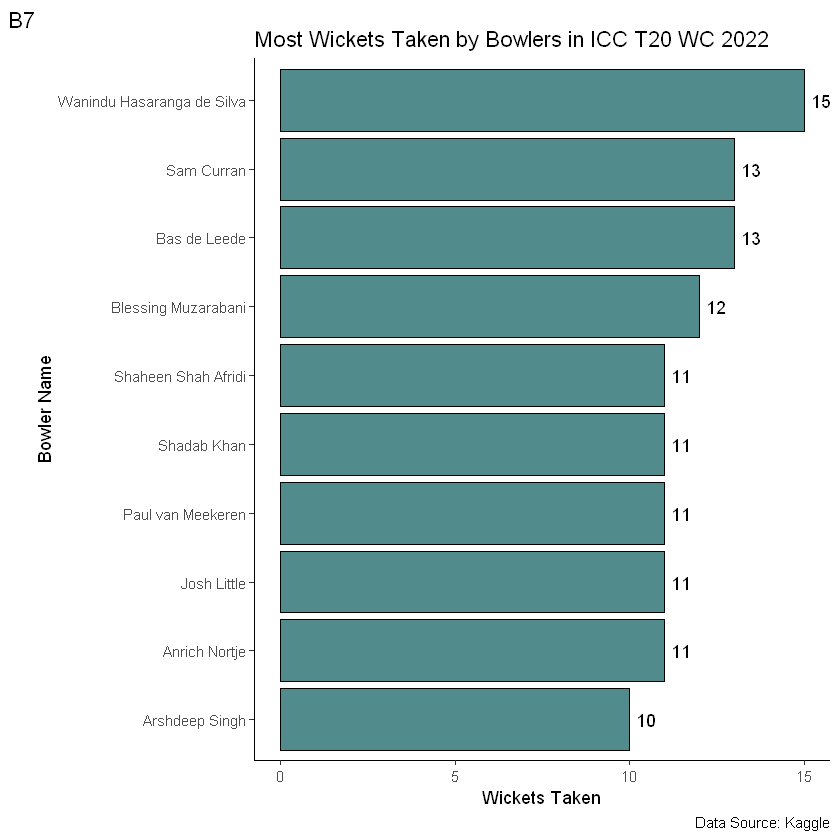

In [16]:
ggplot(max.wk, aes(reorder(Player, Wickets), Wickets)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Wickets, hjust = -0.35)) + 
  labs(title = 'Most Wickets Taken by Bowlers in ICC T20 WC 2022' , 
       x = 'Bowler Name', y = 'Wickets Taken', 
       caption = 'Data Source: Kaggle', tag = 'B7')

#### Lowest Economy Rate by Bowlers in ICC T20 WC 2022

In [17]:
low.eco = bowl %>% group_by(fullName) %>% 
summarise(Economy = round(mean(economyRate),digits = 2), wks = sum(wickets)) %>% 
  filter(wks > 8) %>% arrange(Economy) %>% slice(1:12) 

low.eco

fullName,Economy,wks
Anrich Nortje,5.27,11
Shaheen Shah Afridi,6.09,11
Mitchell Santner,6.45,9
Shadab Khan,6.46,11
Paul van Meekeren,6.53,11
Sam Curran,6.63,13
Maheesh Theekshana,6.67,9
Wanindu Hasaranga de Silva,6.77,15
Sikandar Raza,6.88,10
Josh Little,6.94,11


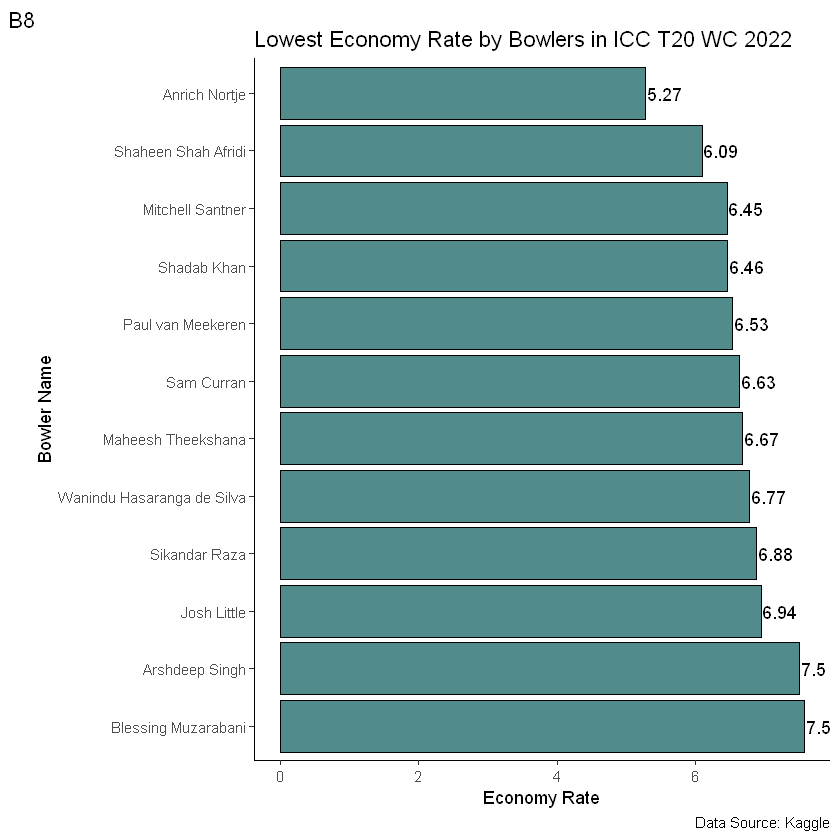

In [18]:
ggplot(low.eco, aes(reorder(fullName, -Economy), Economy)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Economy, hjust = -0.05)) + 
  labs(title = 'Lowest Economy Rate by Bowlers in ICC T20 WC 2022' , 
       x = 'Bowler Name', y = 'Economy Rate', 
       caption = 'Data Source: Kaggle', tag = 'B8')

#### Best Bowling Average in ICC T20 WC 2022

In [19]:
bowl.avg = bowl %>% group_by(fullName) %>% 
  summarise(Innings = n(), Wickets = sum(wickets),
            Average = round(sum(conceded)/sum(wickets), digits = 2)) %>% 
  arrange(Average) %>% filter(Wickets >= 8) %>% slice(1:10)

bowl.avg

fullName,Innings,Wickets,Average
Anrich Nortje,5,11,8.55
Sam Curran,6,13,11.38
Mark Wood,4,9,12.00
Bas de Leede,7,13,13.00
Wanindu Hasaranga de Silva,8,15,13.27
Shaheen Shah Afridi,7,11,14.09
Mitchell Santner,5,9,14.33
Shadab Khan,7,11,15.00
Mohammad Wasim,6,8,15.50
Arshdeep Singh,6,10,15.60


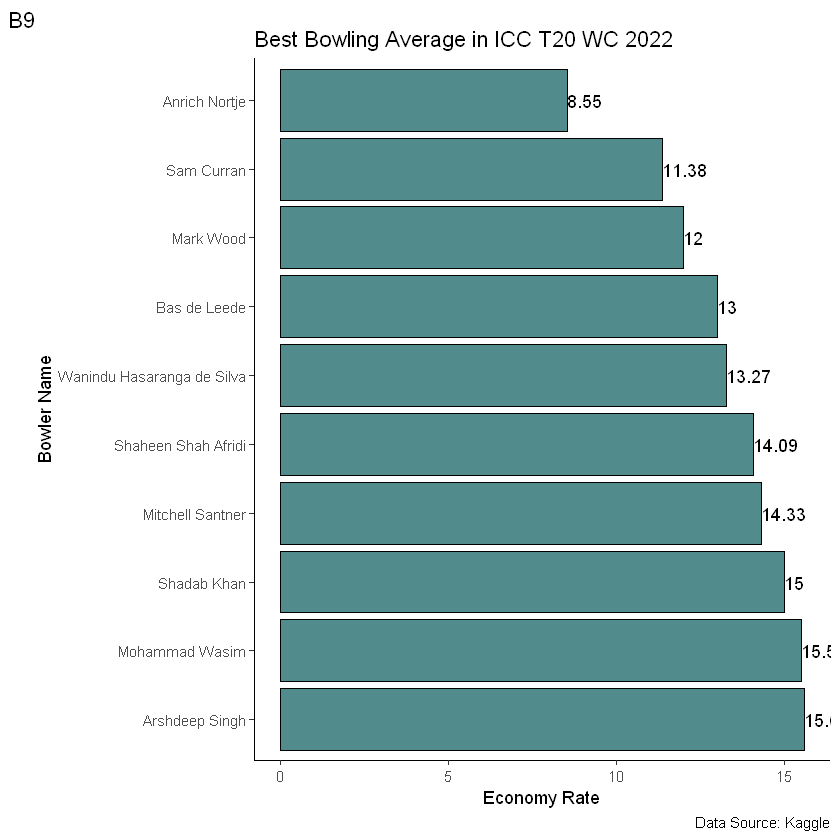

In [20]:
ggplot(bowl.avg , aes(reorder(fullName, -Average), Average)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Average, hjust = -0.0001)) + 
  labs(title = 'Best Bowling Average in ICC T20 WC 2022' , 
       x = 'Bowler Name', y = 'Economy Rate', 
       caption = 'Data Source: Kaggle', tag = 'B9')

#### Most Runs Scored in Powerplay (Overs 1 - 6) in ICC T20 WC 2022

In [21]:
bat.pp.runs = details %>% group_by(batsman1_name) %>% 
  filter(over >= 1 & over <=6) %>% 
  filter(!current_innings %in% c('IRE','NED','SL','ZIM','SCOT')) %>% 
  summarise(Total.runs = sum(runs)) %>% 
  arrange(desc(Total.runs)) %>% slice(1:10)

bat.pp.runs 

batsman1_name,Total.runs
Alex Hales,141
Mohammad Rizwan,120
Jos Buttler,119
Finn Allen,97
Litton Das,97
Quinton de Kock,89
Najmul Hossain Shanto,82
Rohit Sharma,73
KL Rahul,70
Rahmanullah Gurbaz,68


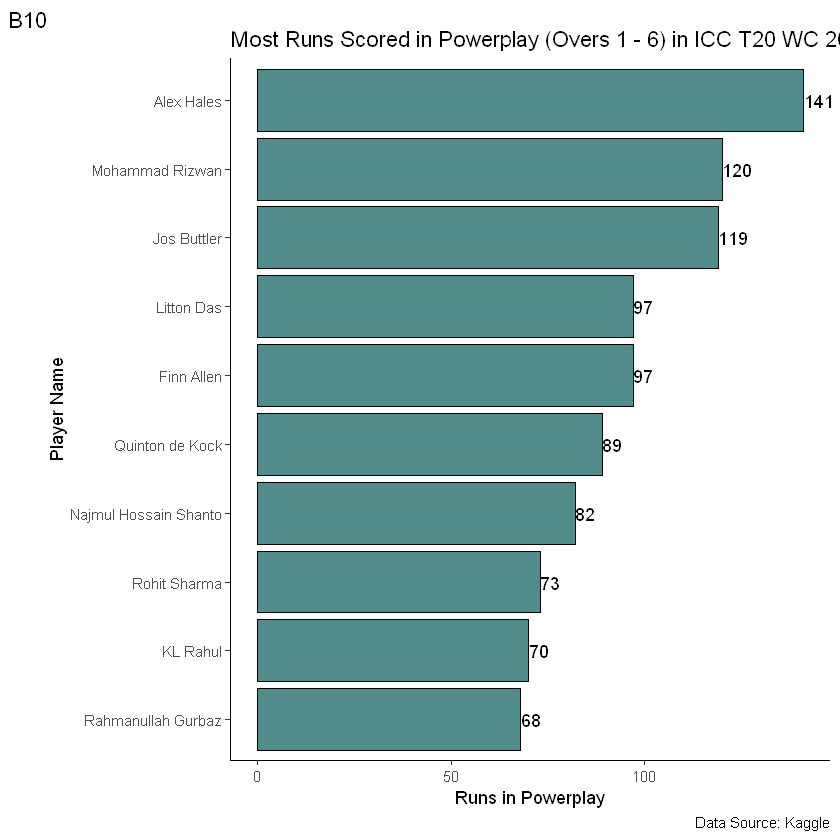

In [22]:
ggplot(bat.pp.runs, aes(reorder(batsman1_name, Total.runs), Total.runs)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Total.runs, hjust = -0.02)) +
labs(title = 'Most Runs Scored in Powerplay (Overs 1 - 6) in ICC T20 WC 2022',
       x = 'Player Name', y = 'Runs in Powerplay', 
       caption = 'Data Source: Kaggle', tag = 'B10')

#### Highest Strike Rate in Powerplay (Overs 1 - 6) for Min. 70 Runs Scored

In [23]:
bat.pp.str = details %>% group_by(batsman1_name) %>% 
  filter(over >= 1 & over <= 6) %>% 
  filter(!current_innings %in% c('IRE','NED','SL','ZIM','SCOT')) %>% 
  summarise(Strike.rate = round(sum(runs)/n() * 100, digits = 2), 
            Total_runs = sum(runs)) %>% 
  arrange(desc(Strike.rate)) %>% filter(Total_runs >= 70)


bat.pp.str

batsman1_name,Strike.rate,Total_runs
Finn Allen,186.54,97
Quinton de Kock,167.92,89
Litton Das,167.24,97
Alex Hales,158.43,141
Jos Buttler,133.71,119
Mohammad Rizwan,113.21,120
Najmul Hossain Shanto,100.00,82
Rohit Sharma,94.81,73
KL Rahul,90.91,70


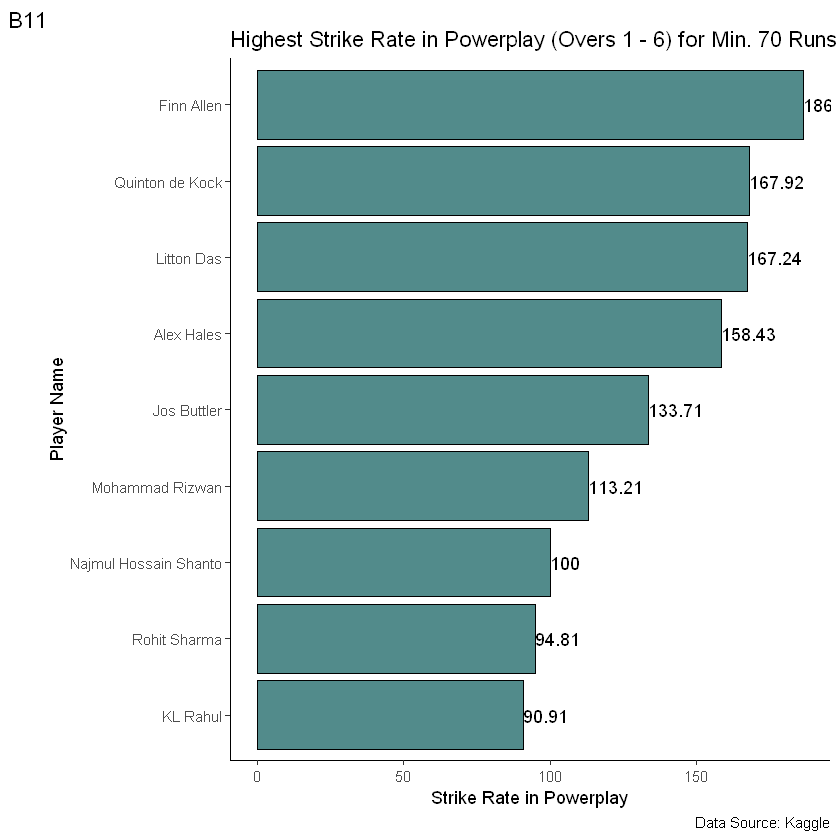

In [24]:
ggplot(bat.pp.str, aes(reorder(batsman1_name, Strike.rate), Strike.rate)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Strike.rate, hjust = -0.001)) +
labs(title = 
'Highest Strike Rate in Powerplay (Overs 1 - 6) for Min. 70 Runs Scored',
       x = 'Player Name', y = 'Strike Rate in Powerplay', 
       caption = 'Data Source: Kaggle', tag = 'B11')

#### Most Runs Scored in Death Overs (Overs 16 - 20) in ICC T20 WC 2022

In [25]:
do.runs = details %>% group_by(batsman1_name) %>% 
  filter(over >= 16 & over <= 20) %>% 
  summarise(Total.runs = sum(runs)) %>% 
  arrange(desc(Total.runs)) %>% slice(1:10)

do.runs

batsman1_name,Total.runs
Virat Kohli,110
Suryakumar Yadav,104
Hardik Pandya,86
Curtis Campher,54
Glenn Phillips,54
Rashid Khan,54
Ben Stokes,53
James Neesham,53
Shan Masood,53
Shadab Khan,49


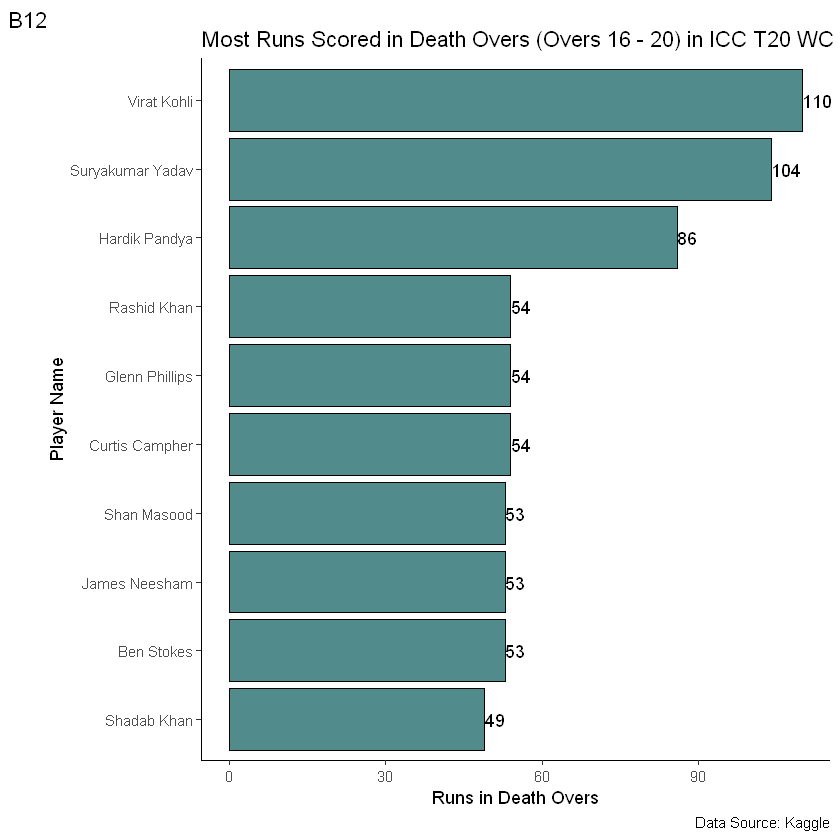

In [26]:
ggplot(do.runs, aes(reorder(batsman1_name, Total.runs), Total.runs)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Total.runs, hjust = -0.01)) +
  labs(title= 'Most Runs Scored in Death Overs (Overs 16 - 20) in ICC T20 WC 2022',
       x = 'Player Name', y = 'Runs in Death Overs', 
       caption = 'Data Source: Kaggle', tag = 'B12')

#### Highest Strike Rate in Death Overs (Overs 16 - 20) for min. 50 Runs Scored

In [27]:
last.sr = details %>% group_by(batsman1_name) %>% 
  filter(over >= 16 & over <= 20) %>%
  summarise(Runs = sum(runs), 
            Strike_rate= round(sum(runs)/ n() * 100, digits = 2)) %>% 
  arrange(desc(Strike_rate)) %>% filter(Runs >= 50)

last.sr$Strike_rate = paste0(last.sr$Strike_rate , '%')  

last.sr

batsman1_name,Runs,Strike_rate
Suryakumar Yadav,104,236.36%
Curtis Campher,54,216%
Virat Kohli,110,211.54%
Rashid Khan,54,186.21%
Glenn Phillips,54,180%
Hardik Pandya,86,179.17%
James Neesham,53,143.24%
Shan Masood,53,143.24%
Ben Stokes,53,139.47%


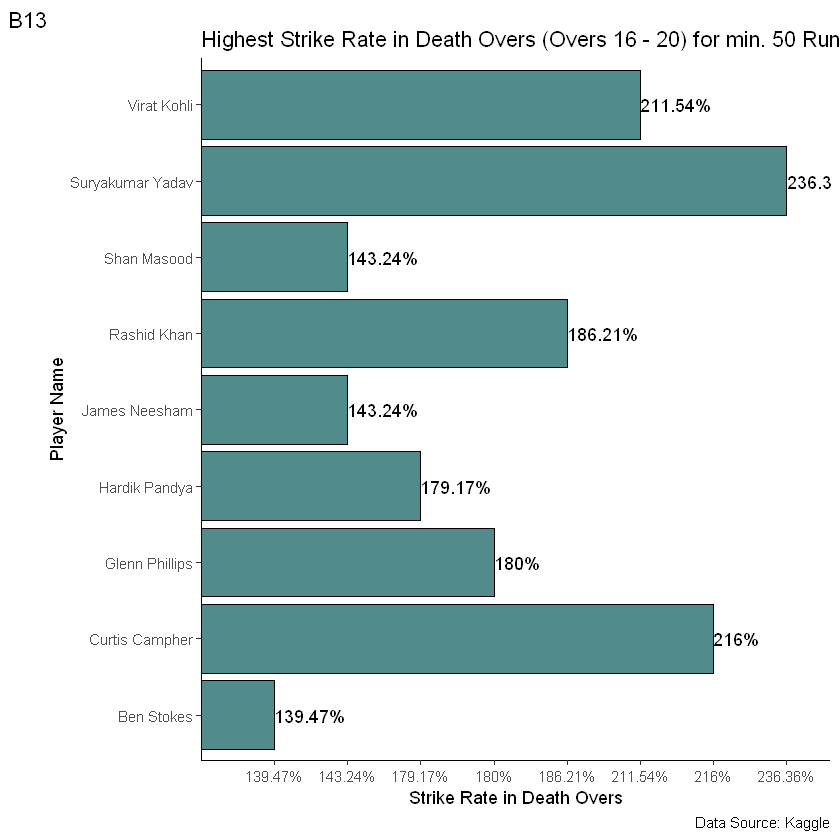

In [28]:
ggplot(last.sr, aes(reorder(batsman1_name, Strike_rate), Strike_rate)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Strike_rate, hjust = -0.001)) +
labs(title = 
    'Highest Strike Rate in Death Overs (Overs 16 - 20) for min. 50 Runs Scored',
       x = 'Player Name', y = 'Strike Rate in Death Overs', 
       caption = 'Data Source: Kaggle', tag = 'B13')

#### Most Wickets Taken in Powerplay Overs (1 - 6) in ICC T20 WC

In [29]:
details[details == 2 | details == 3 | details == 4 | details == 5] = '1'  

In [30]:
pp.wk = details %>% group_by(bowler1_name) %>% 
  filter(over >= 1 & over <= 6) %>% filter(bowler1_wkts == 1) %>% 
  summarise(Wickets = sum(bowler1_wkts), PP.overs = sum(bowler1_overs))%>%
  arrange(desc(Wickets),PP.overs) %>% slice(1:10)

pp.wk

ERROR: Error in sum(bowler1_overs): invalid 'type' (character) of argument


In [32]:
details$bowler1_overs = as.numeric(details$bowler1_overs)

In [33]:
pp.wk = details %>% group_by(bowler1_name) %>% 
  filter(over >= 1 & over <= 6) %>% filter(bowler1_wkts == 1) %>% 
  summarise(Wickets = sum(bowler1_wkts), PP.overs = sum(bowler1_overs))%>%
  arrange(desc(Wickets),PP.overs) %>% slice(1:10)

pp.wk

bowler1_name,Wickets,PP.overs
Bas de Leede,13,22.7
Blessing Muzarabani,12,17.3
Sam Curran,12,24.5
Wanindu Hasaranga de Silva,12,27.8
Shaheen Shah Afridi,11,19.9
Josh Little,11,25.2
Arshdeep Singh,10,10.4
Sikandar Raza,10,19.7
Paul van Meekeren,9,10.6
Maheesh Theekshana,9,14.0


In [ ]:
str(details)

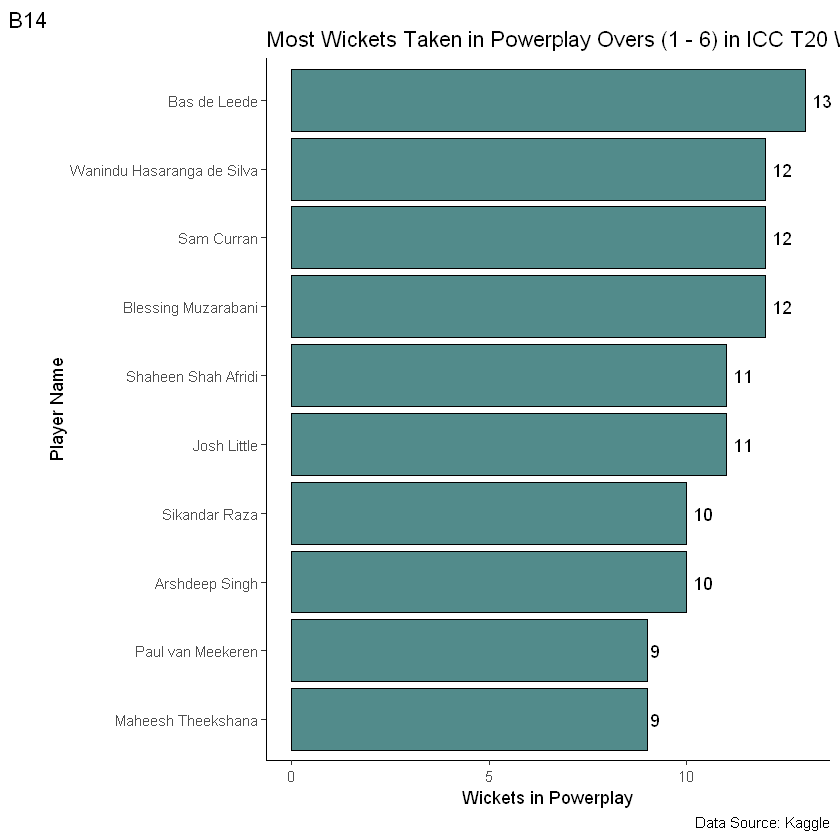

In [34]:
ggplot(pp.wk, aes(reorder(bowler1_name, Wickets), Wickets)) + 
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Wickets, hjust = -0.35)) +
  labs(title = 'Most Wickets Taken in Powerplay Overs (1 - 6) in ICC T20 WC',
       x = 'Player Name', y = 'Wickets in Powerplay', 
       caption = 'Data Source: Kaggle', tag = 'B14')

#### Most Wickets Taken in Death Overs (16 - 20) in ICC T20 WC

In [35]:
last.wk = details %>% group_by(bowler1_name) %>% 
  filter(over >= 16 & over <= 20) %>% filter(bowler1_wkts == 1) %>% 
  filter(!away_team %in% c('IRE','NED','SL','ZIM','SCOT')) %>% 
  summarise(Wickets = sum(bowler1_wkts), 
            death.overs = sum(bowler1_overs))%>%
  arrange(desc(Wickets), death.overs) %>% slice(1:10)

last.wk

bowler1_name,Wickets,death.overs
Sam Curran,9,21.2
Mark Wood,6,13.7
Chris Jordan,4,7.5
Anrich Nortje,4,10.9
Mohammad Wasim,4,11.0
Shaheen Shah Afridi,4,11.0
Liam Livingstone,3,5.2
Shakib Al Hasan,3,6.9
Trent Boult,3,7.4
Hasan Mahmud,3,8.6


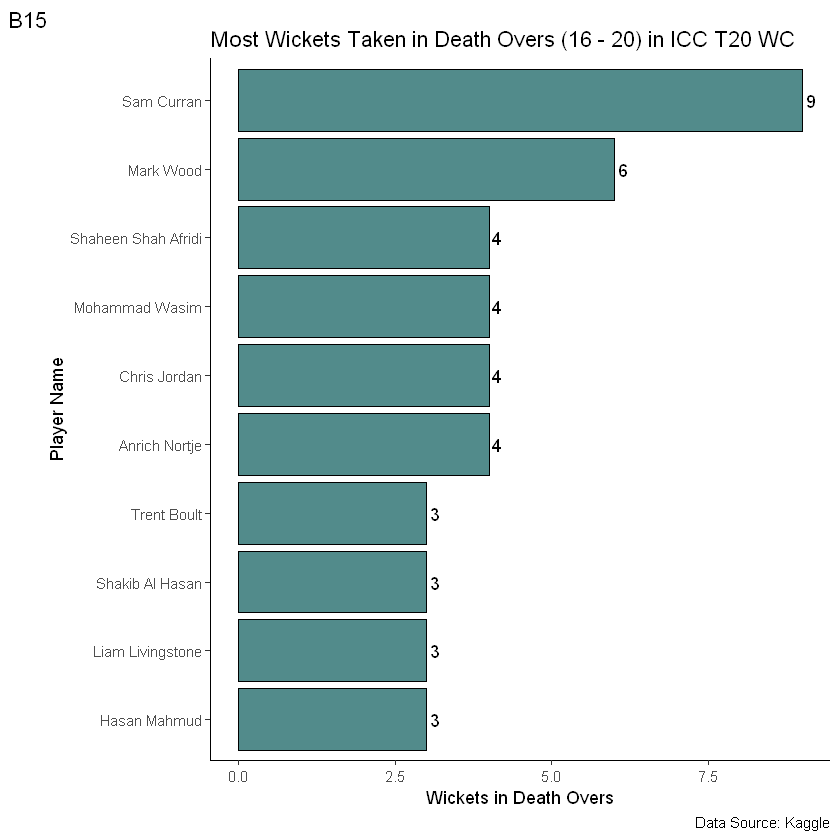

In [36]:
ggplot(last.wk, aes(reorder(bowler1_name, Wickets), Wickets)) + 
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Wickets, hjust = -0.35)) +
  labs(title = 'Most Wickets Taken in Death Overs (16 - 20) in ICC T20 WC',
       x = 'Player Name', y = 'Wickets in Death Overs', 
       caption = 'Data Source: Kaggle', tag = 'B15')

#### Lowest Economy Rate in Powerplay Overs (1 - 6) in ICC T20 W

In [3]:
pp.eco1 = details %>% group_by(bowler1_name) %>% 
  filter(over >= 1 & over <= 6) %>% 
  filter(isWide == 'FALSE', isNoball == 'FALSE') %>% 
  summarise(Balls.bowled = n())

pp.eco1[1:10, ]

bowler1_name,Balls.bowled
Aayan Afzal Khan,12
Adil Rashid,18
Akeal Hosein,24
Alzarri Joseph,30
Anrich Nortje,30
Arshdeep Singh,54
Aryan Lakra,6
Axar Patel,18
Azmatullah Omarzai,6
Barry McCarthy,48


In [4]:
pp.eco2 = details %>% group_by(bowler1_name) %>% 
  filter(over >= 1 & over <=6) %>% 
  summarise(Run.conceded = sum(runs)) %>% 
  rename(Bowler_name = bowler1_name)

pp.eco2[1:10, ]

Bowler_name,Run.conceded
Aayan Afzal Khan,15
Adil Rashid,15
Akeal Hosein,37
Alzarri Joseph,48
Anrich Nortje,25
Arshdeep Singh,58
Aryan Lakra,10
Axar Patel,22
Azmatullah Omarzai,9
Barry McCarthy,57


In [5]:
pp.eco = cbind(pp.eco1, pp.eco2)

In [6]:
pp.eco.new = pp.eco %>% filter(Balls.bowled > 60) %>% 
  mutate(Eco.rate = (Run.conceded *6)/ (Balls.bowled)) %>% 
  select(Bowler_name, Eco.rate) %>% 
 arrange(Eco.rate)

pp.eco.new$Eco.rate = round(pp.eco.new$Eco.rate, digits = 2)

pp.eco.new

Bowler_name,Eco.rate
Taskin Ahmed,5.42
Shaheen Shah Afridi,5.46
Fred Klaassen,5.56
Bhuvneshwar Kumar,5.69
Paul van Meekeren,6.08
Josh Little,6.15
Tendai Chatara,6.57
Naseem Shah,6.62
Blessing Muzarabani,6.93
Mark Adair,7.25


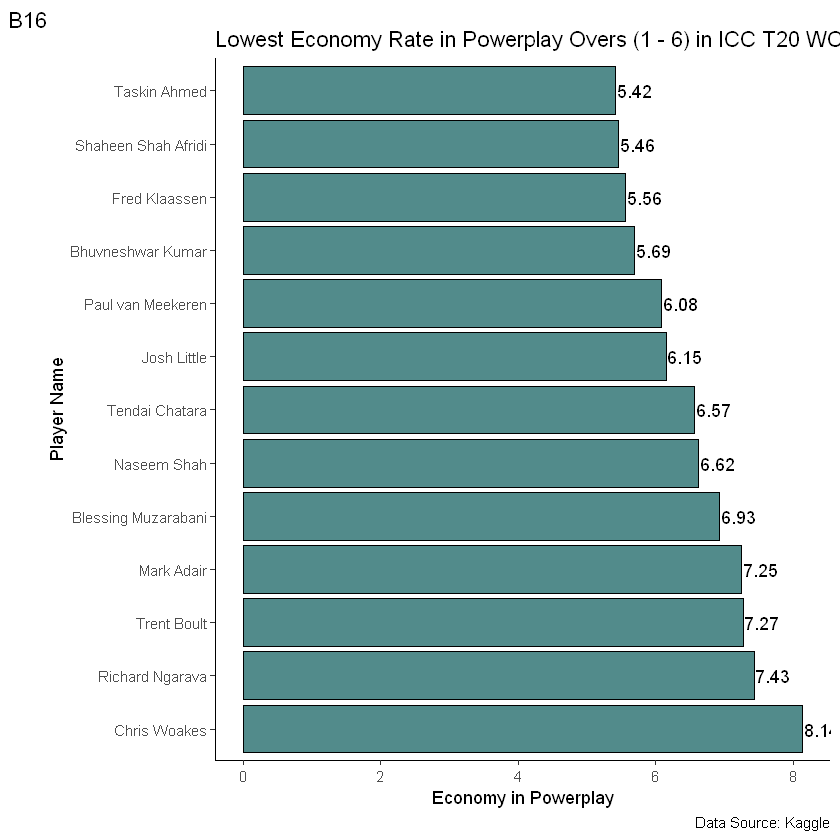

In [7]:
ggplot(pp.eco.new, aes(reorder(Bowler_name, -Eco.rate), Eco.rate)) + 
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Eco.rate, hjust = -0.05)) +
  labs(title = 'Lowest Economy Rate in Powerplay Overs (1 - 6) in ICC T20 WC',
       x = 'Player Name', y = 'Economy in Powerplay', 
       caption = 'Data Source: Kaggle', tag = 'B16')

#### Lowest Economy Rate in Death Overs (16 - 20) in ICC T20 WC

In [8]:
last.eco1 = details %>% group_by(bowler1_name) %>% 
  filter(over >= 16 & over <= 20) %>% 
  filter(isWide == 'FALSE', isNoball == 'FALSE') %>% 
  summarise(Balls.bowled = n()) 

last.eco1[1:10, ]

bowler1_name,Balls.bowled
Aayan Afzal Khan,6
Adil Rashid,12
Alzarri Joseph,30
Anrich Nortje,33
Arshdeep Singh,36
Axar Patel,2
Azmatullah Omarzai,1
Barry McCarthy,36
Bas de Leede,57
Ben Stokes,8


In [9]:
last.eco2 = details %>% group_by(bowler1_name) %>% 
  filter(over >= 16 & over <= 20) %>% 
  summarise(Runs.conceded = sum(runs)) %>% 
  rename(Bowler_name = bowler1_name)

last.eco2[1:10, ]

Bowler_name,Runs.conceded
Aayan Afzal Khan,4
Adil Rashid,13
Alzarri Joseph,22
Anrich Nortje,42
Arshdeep Singh,63
Axar Patel,4
Azmatullah Omarzai,2
Barry McCarthy,79
Bas de Leede,72
Ben Stokes,14


In [10]:
last.eco = cbind(last.eco1, last.eco2)

In [11]:
last.eco.new = last.eco %>% filter(Balls.bowled > 30) %>%
  filter(!Bowler_name == 'David Wiese') %>% 
  mutate(Eco.rate = (Runs.conceded *6)/(Balls.bowled)) %>% 
  select(Bowler_name, Eco.rate) %>% arrange(Eco.rate) %>% slice(1:10)

last.eco.new$Eco.rate = round(last.eco.new$Eco.rate, digits = 2)

last.eco.new

Bowler_name,Eco.rate
Naseem Shah,6.57
Sam Curran,6.75
Paul van Meekeren,6.83
Shaheen Shah Afridi,6.97
Trent Boult,7.17
Haris Rauf,7.20
Tim Southee,7.42
Bas de Leede,7.58
Anrich Nortje,7.64
Richard Ngarava,7.69


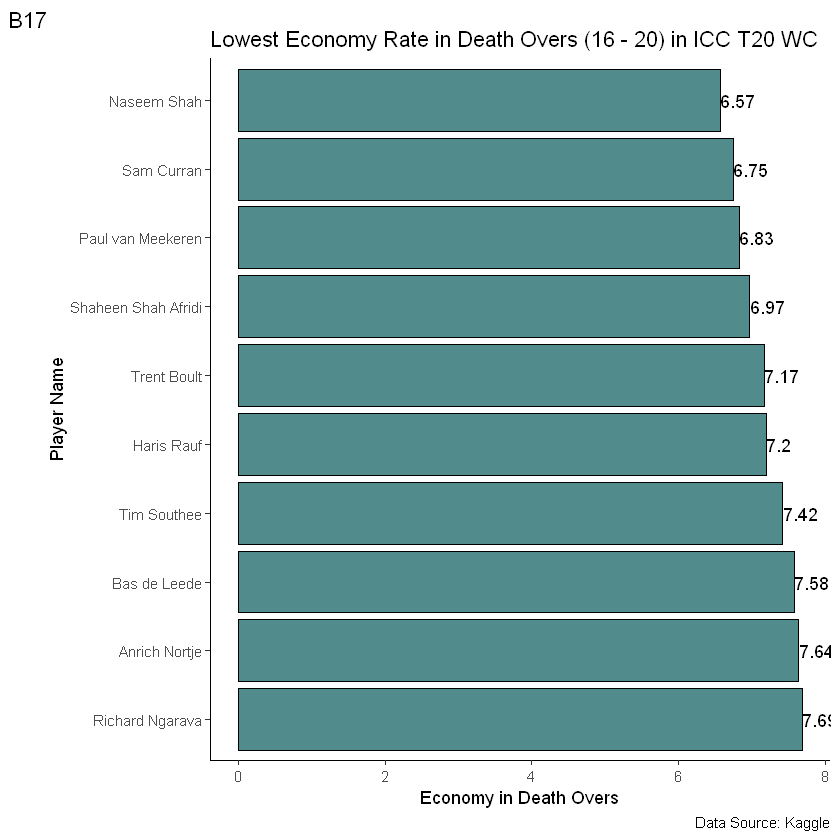

In [13]:
ggplot(last.eco.new, aes(reorder(Bowler_name, -Eco.rate), Eco.rate)) + 
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Eco.rate, hjust = -0.005)) +
  labs(title = 'Lowest Economy Rate in Death Overs (16 - 20) in ICC T20 WC',
       x = 'Player Name', y = 'Economy in Death Overs', 
       caption = 'Data Source: Kaggle', tag = 'B17')

### Analysis on Various Stadiums used for T20 WC 2022

#### Stadiums that Hosted Max. No. of Matches in ICC T20 WC 2022

In [14]:
venue = t20.sum %>% group_by(venue_name) %>% 
  summarise(Matches = n())

venue

venue_name,Matches
Adelaide Oval,7
"Bellerive Oval, Hobart",9
"Brisbane Cricket Ground, Woolloongabba, Brisbane",4
Melbourne Cricket Ground,7
Perth Stadium,5
"Simonds Stadium, South Geelong, Victoria",6
Sydney Cricket Ground,7


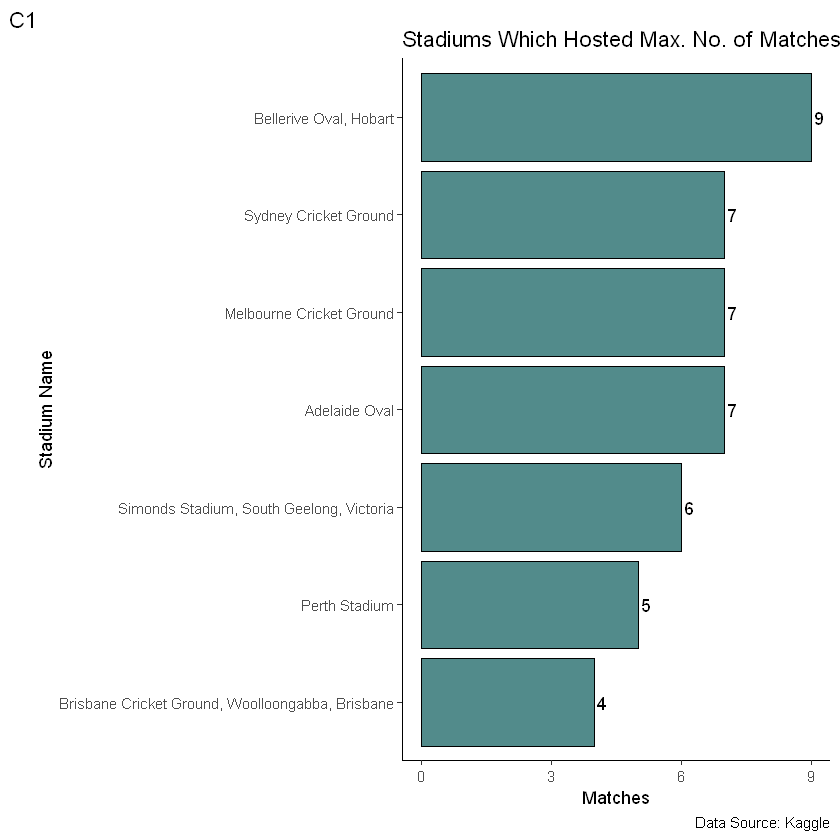

In [16]:
ggplot(venue, aes(reorder(venue_name, Matches), Matches)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Matches , hjust = -0.3)) +
  labs(title = 'Stadiums Which Hosted Max. No. of Matches in ICC T20 WC 2022', 
       x = 'Stadium Name', caption = 'Data Source: Kaggle', tag = 'C1') + 
  scale_y_continuous(breaks = c(0,3,6,9))

#### Most Wins After Batting First on a Particular Stadium in ICC T20 WC 2022

In [23]:
ven.bat1 = t20.sum %>% group_by(venue_name) %>% 
  filter(decision == 'BAT FIRST') %>% summarise(Wins_after_bat_first = n()) %>% 
  rename(x = venue_name)  %>% rename(Stadium = x)

In [24]:
ven.bat = cbind(venue, ven.bat1)

ven.bat = ven.bat %>% select(venue_name, Matches, Wins_after_bat_first)

ven.bat

venue_name,Matches,Wins_after_bat_first
Adelaide Oval,7,2
"Bellerive Oval, Hobart",9,6
"Brisbane Cricket Ground, Woolloongabba, Brisbane",4,3
Melbourne Cricket Ground,7,1
Perth Stadium,5,3
"Simonds Stadium, South Geelong, Victoria",6,4
Sydney Cricket Ground,7,6


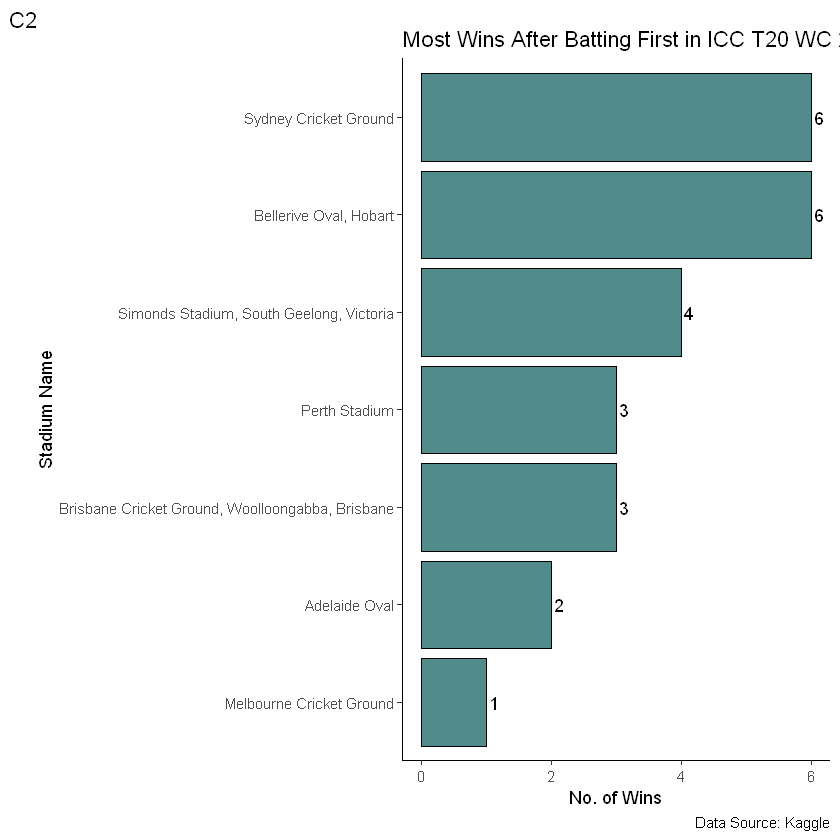

In [26]:
ggplot(ven.bat, aes(reorder(venue_name, Wins_after_bat_first), 
                    Wins_after_bat_first)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Wins_after_bat_first , hjust = -0.3)) +
  labs(title = 'Most Wins After Batting First in ICC T20 WC 2022', 
  x = 'Stadium Name', caption = 'Data Source: Kaggle', tag = 'C2',
  y = 'No. of Wins')


#### Most Wins After Batting Second on a Particular Stadium in ICC T20 WC 2022

In [27]:
ven.bowl.1 = t20.sum %>% group_by(venue_name) %>% 
  filter(decision == 'BOWL FIRST') %>%
  summarise(Wins_after_bat_second = n()) %>% rename(x = venue_name)

In [28]:
ven.bowl = cbind(venue, ven.bowl.1)

ven.bowl = ven.bowl %>% select(venue_name, Matches, Wins_after_bat_second)

ven.bowl

venue_name,Matches,Wins_after_bat_second
Adelaide Oval,7,5
"Bellerive Oval, Hobart",9,3
"Brisbane Cricket Ground, Woolloongabba, Brisbane",4,1
Melbourne Cricket Ground,7,3
Perth Stadium,5,2
"Simonds Stadium, South Geelong, Victoria",6,2
Sydney Cricket Ground,7,1


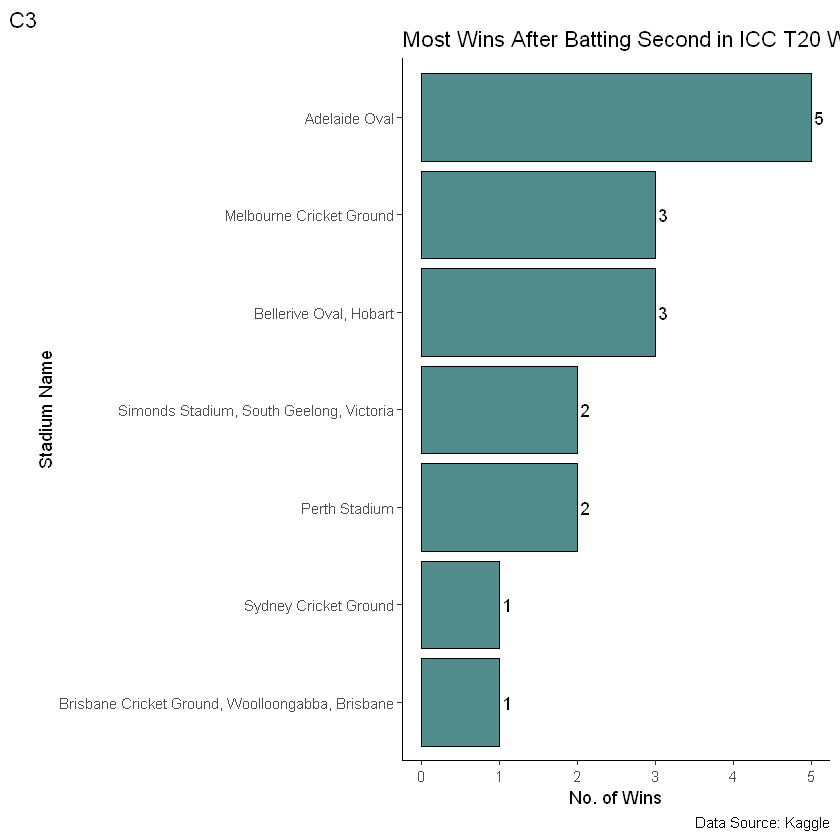

In [30]:
ggplot(ven.bowl, aes(reorder(venue_name, Wins_after_bat_second), Wins_after_bat_second)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Wins_after_bat_second , hjust = -0.3)) +
  labs(title = 'Most Wins After Batting Second in ICC T20 WC 2022', 
       x = 'Stadium Name', caption = 'Data Source: Kaggle', tag = 'C3',
       y = 'No. of Wins')

#### Win % After Batting Second on a Particular Stadium in ICC T20 WC 2022

In [31]:
ven.bowl.ratio =  ven.bowl %>% mutate(Bat_second_win_ratio = 
                      round(Wins_after_bat_second/Matches*100,digits = 2)) %>% 
  select(venue_name, Bat_second_win_ratio)

ven.bowl.ratio$Bat_second_win_ratio = paste0(ven.bowl.ratio$Bat_second_win_ratio,"%")

ven.bowl.ratio

venue_name,Bat_second_win_ratio
Adelaide Oval,71.43%
"Bellerive Oval, Hobart",33.33%
"Brisbane Cricket Ground, Woolloongabba, Brisbane",25%
Melbourne Cricket Ground,42.86%
Perth Stadium,40%
"Simonds Stadium, South Geelong, Victoria",33.33%
Sydney Cricket Ground,14.29%


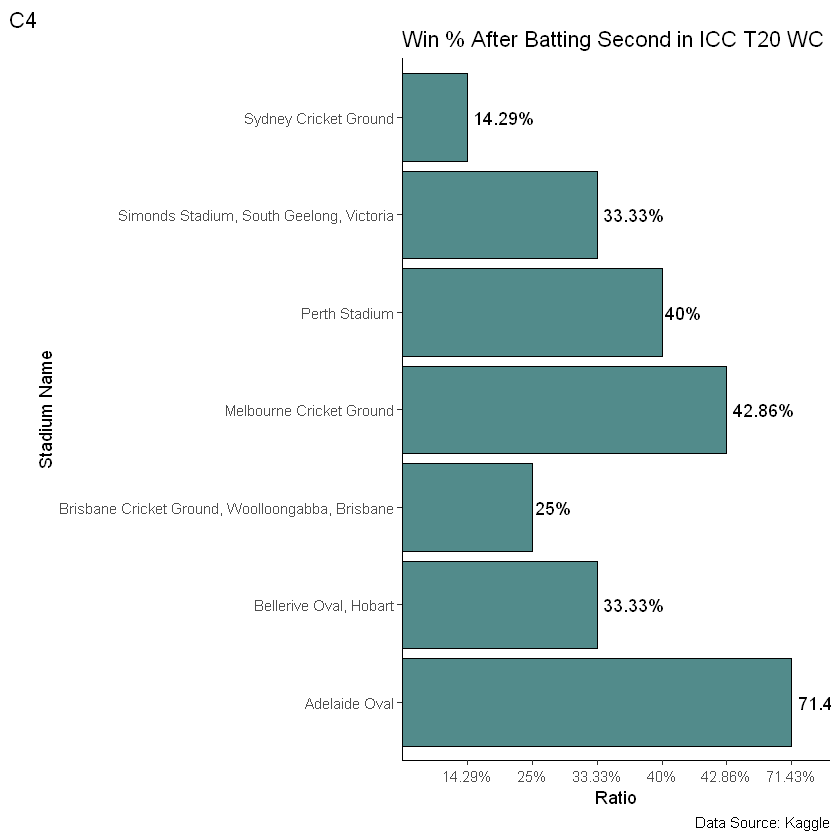

In [42]:
ggplot(ven.bowl.ratio, aes(reorder(venue_name, Bat_second_win_ratio), 
                           Bat_second_win_ratio)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Bat_second_win_ratio , hjust = -0.1)) +
  labs(title = 'Win % After Batting Second in ICC T20 WC', 
       x = 'Stadium Name', caption = 'Data Source: Kaggle', tag = 'C4',
       y = 'Ratio')

#### Win % After Batting First on a Particular Stadium in ICC T20 WC 2022

In [32]:
ven.bat.ratio = ven.bat %>% mutate(Bat_first_win_ratio = 
                   round(Wins_after_bat_first/Matches*100,digits = 2)) %>% 
  select(venue_name, Bat_first_win_ratio)

ven.bat.ratio$Bat_first_win_ratio = paste0(ven.bat.ratio$Bat_first_win_ratio,'%')

ven.bat.ratio

venue_name,Bat_first_win_ratio
Adelaide Oval,28.57%
"Bellerive Oval, Hobart",66.67%
"Brisbane Cricket Ground, Woolloongabba, Brisbane",75%
Melbourne Cricket Ground,14.29%
Perth Stadium,60%
"Simonds Stadium, South Geelong, Victoria",66.67%
Sydney Cricket Ground,85.71%


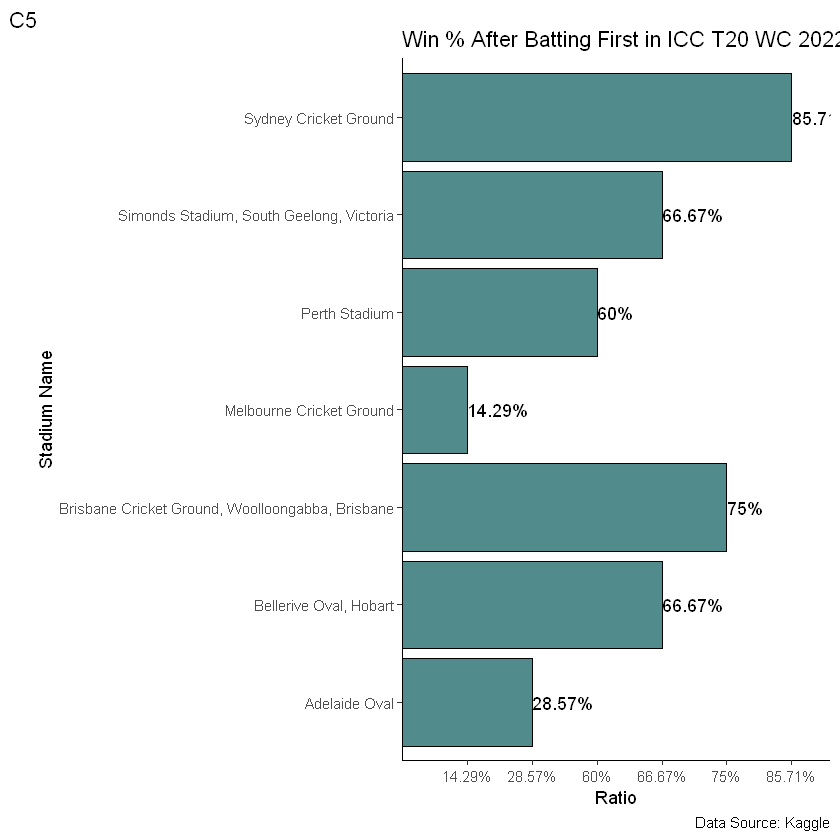

In [43]:
ggplot(ven.bat.ratio, aes(reorder(venue_name, Bat_first_win_ratio), 
                          Bat_first_win_ratio)) +
  theme_classic() + coord_flip() +
  geom_bar(stat = 'identity', fill = 'darkslategray4', col = 'black') +
  geom_text(aes(label = Bat_first_win_ratio, hjust = -0.01)) +
  labs(title = 'Win % After Batting First in ICC T20 WC 2022', 
       x = 'Stadium Name', caption = 'Data Source: Kaggle', tag = 'C5',
       y = 'Ratio')
